# T-DAB Challenge: Marine Electronics Company

## Part II - A ) Modeling Trees - Learning from my mistakes...

### Your second task is to build a model that will alert sailors of tacking event happening in the future.

Your supervisor told you that on top of whatever you come up with, what you should definitely do is "tack prediction".

```“A tack is a specific maneuver in sailing and alerting the sailor of the necessity to tack in the near future would bring some advantage to them compared to other sailors, who would have to keep an eye out on the conditions all the time to decide when to tack”``` he writes in his email. The supervisor, who has some experience in sailing labels the tacks in the data from the client (added as `Tacking` column in the data).

<b>[Wikipedia](https://en.wikipedia.org/wiki/Tacking_(sailing)#:~:text=Tacking%20is%20a%20sailing%20maneuver,progress%20in%20the%20desired%20direction.)<b>
```Tacking is a sailing maneuver by which a sailing vessel, whose desired course is into the wind, turns its bow toward the wind so that the direction from which the wind blows changes from one side to the other, allowing progress in the desired direction.```

In [1]:
# Importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import datetime as dt
# Set seaborn style 
sns.set(style="darkgrid")
sns.set(font_scale=1.5)

In [2]:
# Read cleaned data
df = pd.read_csv('./data/clean_data.csv',header = 0)
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.set_index('DateTime', inplace = True)
print(df.info())
df.head(5).transpose()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 199838 entries, 2019-04-14 00:00:00 to 2019-04-16 07:33:19
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CurrentSpeed  199838 non-null  float64
 1   CurrentDir    199838 non-null  float64
 2   TWS           199838 non-null  float64
 3   TWA           199838 non-null  float64
 4   AWS           199838 non-null  float64
 5   AWA           199838 non-null  float64
 6   Roll          199838 non-null  float64
 7   Pitch         199838 non-null  float64
 8   HeadingMag    199838 non-null  float64
 9   HoG           199838 non-null  float64
 10  HeadingTrue   199838 non-null  float64
 11  AirTemp       199838 non-null  float64
 12  Longitude     199838 non-null  float64
 13  Latitude      199838 non-null  float64
 14  SoG           199838 non-null  float64
 15  SoS           199838 non-null  float64
 16  AvgSoS        199838 non-null  float64
 17  VMG           

DateTime,2019-04-14 00:00:00,2019-04-14 00:00:01,2019-04-14 00:00:02,2019-04-14 00:00:03,2019-04-14 00:00:04
CurrentSpeed,0.075600,0.075600,0.075600,0.075600,0.075600
CurrentDir,123.000000,123.000000,123.000000,123.000000,123.000000
TWS,10.800000,10.800000,10.800000,10.800000,10.800000
TWA,48.000000,48.000000,48.000000,48.000000,48.000000
AWS,10.400000,10.400000,10.400000,10.400000,10.400000
AWA,48.000000,48.000000,48.000000,48.000000,48.000000
Roll,-3.540000,-3.540000,-3.520000,-3.520000,-3.500000
Pitch,9.080000,9.080000,9.099999,9.099999,9.099999
HeadingMag,24.000000,24.000000,24.000000,24.000000,24.000000
HoG,308.000000,308.000000,308.000000,308.000000,308.000000


In [3]:
def get_summary(input_data):
    # Get a whole bunch of stats
    output_data = input_data.describe().transpose()
    
    # Count NANs
    output_data['number_nan'] = input_data.shape[0] - output_data['count']
    
    # Count unique values
    output_data['number_distinct'] = input_data.apply(lambda x: len(pd.unique(x)), axis=0) 
    
    # Print DateTime information
    try:
        print(input_data['DateTime'].describe(datetime_is_numeric=True))
    except:
        pass
    
    return output_data

get_summary(df)

,count,mean,std,min,25%,50%,75%,max,number_nan,number_distinct
CurrentSpeed,199838.0,1.063292,0.791875,0.016200,0.475200,0.864000,1.571400,5.697000,0.0,969
CurrentDir,199838.0,135.765530,69.140224,0.000000,96.000000,106.000000,149.000000,359.000000,0.0,366
TWS,199838.0,15.037102,3.585503,1.700000,12.800000,15.400000,17.600000,29.100000,0.0,279
TWA,199838.0,57.257449,23.197387,-179.000000,51.000000,59.000000,63.000000,179.000000,0.0,352
AWS,199838.0,20.024452,5.348213,2.800000,16.600000,21.299999,23.900000,37.000000,0.0,343
AWA,199838.0,39.552528,20.926712,-177.000000,33.000000,37.000000,42.000000,169.000000,0.0,296
Roll,199838.0,-14.891839,6.953146,-39.299999,-19.820000,-16.260000,-11.080000,10.139999,0.0,1942
Pitch,199838.0,5.976212,2.702618,-7.880000,4.120000,6.100000,8.420000,17.359999,0.0,1028
HeadingMag,199838.0,33.329727,47.798202,0.000000,19.000000,24.000000,31.000000,359.000000,0.0,319
HoG,199838.0,70.049950,115.468602,0.000000,9.000000,16.000000,32.000000,359.000000,0.0,362


## Tree Based Modeling (Desicion Tree / Random Forest / XGBoost with Tree Stumps

- I can start my analysis with Tree Based Models because they are more flexible in terms of data pre-processing requirements.
- The scale of the features will not negatively impact the models as they would in Distance Based or Linear Classifiers
- They are good to inform the feature selection process

In [4]:
# Import all relevant scikit-learn modules

# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# ROC-AUC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Tree Models + Ensembles
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

# Set SEED
SEED = 42

### Feature Reference

In [5]:
# Importing features' descriptions
var_dict = pd.read_json('./data/data_dict.json')
var_dict.transpose().sort_values('units')

,name,units,range,description
TensPilote,VoltageDrawn,Volts,None,Voltage drawn by the system of one of its parts
Longitude,Longitude,degrees,"[0, 360]",Longitudinal coordinate
Barre,RudderAng,degrees,None,Rudder angle
Latitude,Latitude,degrees,"[0, 360]",Latitudinal coordinate
Derive,Leeway,degrees,None,
Route,HeadingTrue,degrees,None,true heading. True heading - heading over grou...
CapFond,HoG,degrees,None,heading over ground
CapMagPil,HeadingMag,degrees,None,magnetic heading
3DH_Roulis,Roll,degrees,None,"Roll, also equals to -Heel"
AngVentApp,AWA,degrees,None,Apparent Wind Angle


In [6]:
# Yaw description
var_dict['Route'].description

'true heading. True heading - heading over ground = Yaw'

In [7]:
# Grouping our (27) features by similar categories / units 

# Speed Group 1 [knots]
wind_sp_cols = ['TWS', 'AWS', 'WSoG']

# Speed Group 2 [knots]
ship_sp_cols = ['SoG', 'SoS', 'AvgSoS', 'VMG']

# Direction Group 1 [degrees]
direction_cols = ['TWA', 'AWA', 'TWD']

# Direction Group 2 [degrees]
heading_cols = ['HeadingMag', 'HoG', 'HeadingTrue','Yaw']

# Current Group
current_cols = ['CurrentDir', 'CurrentSpeed']

# Axes Group 1 [degrees]
axes_cols = ['Roll', 'Pitch']

# Axes Group 2 [degrees] - Rudder (Timon)
angle_cols = ['RudderAng', 'Leeway']

# Pilote Group [degrees]
voltgage_cols = ['VoltageDrawn'] 

# GeoLoc Group [degrees]
geo_cols = ['Longitude', 'Latitude']

# Temperature Group [Celcius]
temperature_col = ['AirTemp']

# DateTime index
datetime_col = 'DateTime'

# Mode Pilote 
mp_col = 'ModePilote'

# Target Variable
target = 'Tacking'

### Feature Selection

Feature selection is an iterative process. To start my analysis I did the following:

- I discarded variables that were highly correlated (See EDA pair plots and Correlation Matrix). Addittionally, I tried to keep (when possible) those variables that appeared Normally distributed (See EDA histograms) in part I.
- I payed attention to Normally Distributed features because after trying Tree Based models I wanted to try models such as Logistic Regression and LinearSVM. Those models will require me to standarize the variables of interest.
- I also dropped unique identifiers such as: `Date`, `Latitude` and `Longitude`. This last two were very granular variables, increasing monotonously and seemed to give little information on the target variable.
- I also discarded `ModePilote` variable because I did not have information on how that variable was generated and I wanted to avoid potential Data Leakage.

Variable selection:

- I chose Wind Speed Over Ground (`WSoG`) over the highly correlated True Wind Speed (`TWS`) and Apparent Wind Speed (`AWS`)
- I chose Speed Over Ground (`SoG`) over the highly correlated Speed Over Surface (`SoS`) (also linked to `VMG`)  
- I am also intrested in keeping Velocity Made Good (`VMG`) signal
    - Eric Note: Depending on wind speed, there will be an optimum wind angle to sail in order to have the best velocity to the point we are trying to get to. VMG may also be better on one tack or the other depending on shifts in wind direction. It is a key indicator for making decisions like sail choice, tacking/gybing, and wind angle to sail.
- I could try adding and removing Average Speed Over Surface (`AvgSoS`). Notice its distribution is far from Normal.
- I chose True Wind Angle (`TWA`) over the highly correlated Apparent Wind Angle (`AWA`)
- I also kept the "well behaved" True Wind Direction (`TWD`)
- I also kept Magnetic Heading (`HeadingMag`).
- I also included `Yaw` = True heading - Heading Over ground . An leave that combines Heading Over Ground (`HoG`) and True Heading (`HeadingTrue`). 
- I kept `Pitch` over the correlated `Roll`
- I kept both `RudderAngle` and `Leeway`
- `VoltageDrawn`, `AirTemp`, `CurrentDir` and `CurrentSpeed` also seem to be independent variables that fluctuate on a daily basis, I could try adding and removing them from my models and then decide if they help or not in the `Tacking` prediction tast.

Summary of variables to add/remove in Feature Selection: `SoG`, `Pitch`. `RudderAngle`, `Leeway`, `VoltageDrawn`, `Temperature`

In [8]:
# Read SEEN data
df = pd.read_csv('./data/seen_data.csv',header = 0)
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Create a list of column names to drop
to_drop = ['TWS', 'AWS'] + \
['SoS', 'AvgSoS'] + \
['AWA'] + \
['HoG', 'HeadingTrue' ] + \
[] + \
['Roll'] + \
[] + \
['VoltageDrawn'] + \
['Longitude', 'Latitude'] + \
[] + \
['DateTime'] + \
['ModePilote']

keep = ['WSoG'] + \
['SoG','VMG'] + \
['TWA', 'TWD'] + \
['HeadingMag', 'Yaw'] + \
['CurrentDir', 'CurrentSpeed'] + \
['Pitch'] + \
['RudderAng', 'Leeway'] + \
[] + \
[] + \
['AirTemp'] + \
[] + \
[]

# Assert Number of Variables
assert len(to_drop) + len(keep) == 26

# Drop those columns from the dataset
df = df.drop(to_drop, axis=1)

#############################################################################
# selection = ['DateTime', 'CurrentSpeed', 'CurrentDir', 'TWA', 'AWS', 'AWA',
#       'Roll', 'Pitch', 'HeadingMag', 'HoG', 'HeadingTrue', 'AirTemp',
#       'Longitude', 'Latitude', 'SoS', 'AvgSoS', 'VMG', 'RudderAng',
#       'Leeway', 'TWD', 'WSoG', 'VoltageDrawn', 'ModePilote']
# df = df.drop(selection, axis=1)

# Print remaning columns
df.columns

Index(['CurrentSpeed', 'CurrentDir', 'TWA', 'Pitch', 'HeadingMag', 'AirTemp',
       'SoG', 'VMG', 'RudderAng', 'Leeway', 'TWD', 'WSoG', 'Yaw', 'Tacking'],
      dtype='object')

#### Note: SoS might also be informative. Check!

### Model Selection

- Keep in mind that we are dealing with an imbalanced data set
- Sample data with `stratify` following our target variable 
- Maybe try Under-sampling & Over-sampling techniques

In [9]:
# Create a data with all columns except target
X_trees = df.drop("Tacking", axis=1)

# Create a labels column
y_trees = df[["Tacking"]]

# Use stratified sampling to split up the dataset according to the volunteer_y dataset
X_train, X_val, y_train, y_val = train_test_split(X_trees, y_trees, test_size=0.3,stratify=y_trees)

# Print out the target count proportions on the training y test sets
print("Train props:\n",round(y_train["Tacking"].value_counts() / len(y_train["Tacking"]),4))
print("Test props:\n",round(y_val["Tacking"].value_counts() / len(y_val["Tacking"]),4))

Train props:
 0.0    0.9054
1.0    0.0946
Name: Tacking, dtype: float64
Test props:
 0.0    0.9054
1.0    0.0946
Name: Tacking, dtype: float64


In [10]:
X_train.head()

,CurrentSpeed,CurrentDir,TWA,Pitch,HeadingMag,AirTemp,SoG,VMG,RudderAng,Leeway,TWD,WSoG,Yaw
59174,0.5616,121.0,74.0,6.70,27.0,29.606379,11.847601,3.3156,-0.666667,-1.0,88.0,18.000000,-2.0
73922,1.1664,106.0,58.0,1.14,24.0,28.717579,9.531000,4.7844,-0.666667,-2.0,69.0,14.100000,-4.0
15652,0.7182,107.0,51.0,7.96,25.0,27.773228,8.348400,5.8266,8.000000,-2.0,62.0,22.900000,-4.0
96083,1.7604,105.0,57.0,5.44,17.0,26.106730,10.098001,5.6808,-3.000000,-1.0,69.0,19.200001,-10.0
71010,0.4968,129.0,45.0,5.02,22.0,29.828579,8.029800,5.5782,5.333333,-2.0,50.0,16.400000,0.0


### Random Undersampling (Downsampling)

In [11]:
def data_under_sample(df, SEED = 42):

    # Class count
    count_class_0, count_class_1 = df['Tacking'].value_counts()

    # Divide by class
    df_class_0 = df[df['Tacking'] == 0]
    df_class_1 = df[df['Tacking'] == 1]
    
    # Random under-sampling
    df_class_0_under = df_class_0.sample(count_class_1)
    df_under = pd.concat([df_class_0_under, df_class_1], axis=0)

    print('Random under-sampling:')
    print(df_under['Tacking'].value_counts())

    # Checking new distribution
    df_under['Tacking'].value_counts().plot(kind='bar', title='Count (target)')
    plt.show()
    
    return df_under

Random under-sampling:
1.0    11563
0.0    11563
Name: Tacking, dtype: int64


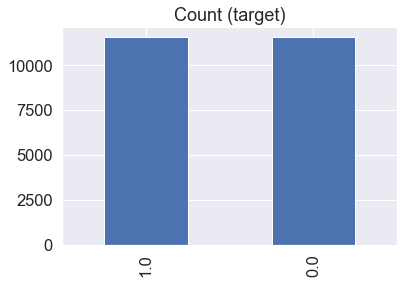

,CurrentSpeed,CurrentDir,TWA,Pitch,HeadingMag,AirTemp,SoG,VMG,RudderAng,Leeway,TWD,WSoG,Yaw,Tacking
60918,0.7182,95.0,49.0,0.16,24.0,29.661928,9.882000,4.9140,2.666667,-2.0,61.0,14.3,-4.0,0.0
50659,0.4266,142.0,51.0,6.48,32.0,29.606379,9.887401,6.6690,-15.000000,-1.0,65.0,18.0,1.0,0.0
110628,1.8306,96.0,64.0,6.10,21.0,25.995628,8.267401,1.9278,8.666667,-1.0,80.0,12.3,-13.0,0.0
107073,2.5218,100.0,64.0,2.38,24.0,26.662230,7.695000,3.7746,6.666667,-2.0,84.0,16.4,-17.0,0.0
99553,2.3058,105.0,63.0,5.60,15.0,26.051178,9.342000,2.2896,14.333334,-2.0,82.0,14.4,340.0,0.0


In [12]:
# Obtain under-sample Dataset
df_under = data_under_sample(df)

# Create an undersampled data with all columns except target
X_under = df.drop("Tacking", axis=1)

# Create a labels column
y_under = df[["Tacking"]]

# Examine Under-sample data
df_under.head()

### Random Over-sampling (Upsampling)

In [13]:
def data_over_sample(df, SEED = 42):

    # Class count
    count_class_0, count_class_1 = df['Tacking'].value_counts()

    # Divide by class
    df_class_0 = df[df['Tacking'] == 0]
    df_class_1 = df[df['Tacking'] == 1]
    
    # Random under-sampling
    df_class_1_over = df_class_1.sample(count_class_0, replace=True)
    df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

    print('Random over-sampling:')
    print(df_over['Tacking'].value_counts())

    # Checking new distribution
    df_over['Tacking'].value_counts().plot(kind='bar', title='Count (target)')
    plt.show()
    
    return df_over

Random over-sampling:
1.0    110677
0.0    110677
Name: Tacking, dtype: int64


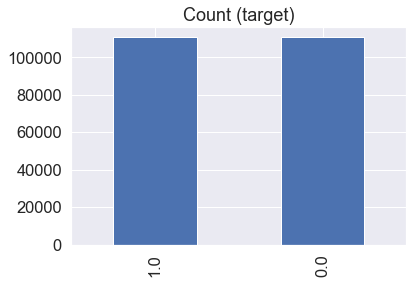

,CurrentSpeed,CurrentDir,TWA,Pitch,HeadingMag,AirTemp,SoG,VMG,RudderAng,Leeway,TWD,WSoG,Yaw,Tacking
6400,2.0412,266.0,66.0,7.78,23.0,27.217728,6.9336,2.8350,4.000000,-1.0,56.0,9.0,-342.0,0.0
6401,2.0412,267.0,67.0,7.04,23.0,27.217728,6.9228,2.6136,4.333333,-2.0,56.0,7.8,-344.0,0.0
6402,2.0304,266.0,67.0,7.30,23.0,27.217728,6.9660,2.3652,4.333333,-2.0,56.0,9.3,-343.0,0.0
6403,2.0682,264.0,68.0,7.58,23.0,27.217728,6.9984,2.0466,4.000000,-2.0,58.0,9.1,-343.0,0.0
6404,2.0844,265.0,69.0,6.68,22.0,27.273279,6.9498,2.2032,5.000000,-1.0,59.0,7.8,-343.0,0.0


In [14]:
# Obtain under-sample Dataset
df_over = data_over_sample(df)

# Create an oversampled data with all columns except target
X_over = df.drop("Tacking", axis=1)

# Create a labels column
y_over = df[["Tacking"]]

# Examine Under-sample data
df_over.head()

### Decission Tree Classifier

In [15]:
# Instantiate a DecisionTreeClassifier 

# Better recall model
# dt = DecisionTreeClassifier(max_depth =  7 , min_samples_leaf = 100 ,class_weight = 'balanced', random_state = SEED)

# Better precision model
dt = DecisionTreeClassifier(max_depth =  7 , min_samples_leaf = 100, random_state = SEED) 

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_val)

# Get parameters from classifier
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 100,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

In [16]:
# Compute confusion matrix
conf_mat = confusion_matrix(y_val, y_pred)
print("Confusion Matrix: \n",conf_mat)

# Compute classification report
report = classification_report(y_val, y_pred)
print("Report: \n",report)

Confusion Matrix: 
 [[33080   123]
 [ 1088  2381]]
Report: 
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     33203
         1.0       0.95      0.69      0.80      3469

    accuracy                           0.97     36672
   macro avg       0.96      0.84      0.89     36672
weighted avg       0.97      0.97      0.96     36672



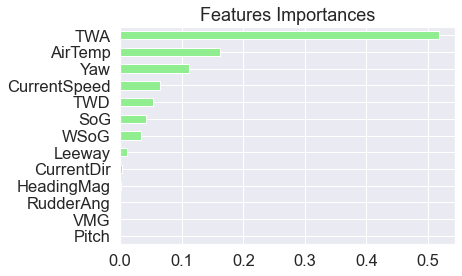

In [17]:
# Create a Series to visualize features importances
importances = pd.Series(data=dt.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

ROC-AUC score: 
 0.8413302310679902


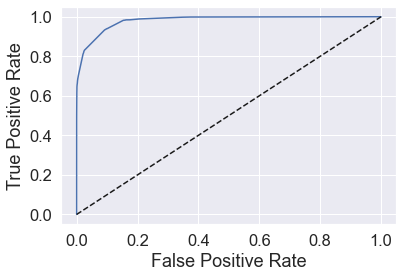

In [18]:
# Compute roc-auc score
rocauc = roc_auc_score(y_val, y_pred)
print("ROC-AUC score: \n",rocauc)

# Generate the probabilities
y_pred_prob = dt.predict_proba(X_val)[:, 1]

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

In [19]:
# Decision Tree Classifier Grid search

# Parameter Grid for Decision Tree
params_dt = {
             'max_depth': [5, 7, 9],
             'min_samples_leaf': [2, 100, 500],
             'min_samples_split': [2, 200, 1000],
             # 'max_features' : [None,'log2','sqrt'],
             'class_weight' : [None, 'balanced']}


# Setting Grid Search 
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='precision',
                       cv=5,
                       verbose = 1,
                       n_jobs=-1)

# Fit RF to the UNDER-SAMPLED set
grid_dt.fit(X_under, np.ravel(y_under))

# Fit RF to the OVER-SAMPLED set
# grid_dt.fit(X_over, np.ravel(y_over))

# Extract the best estimator
dt_best_model = grid_dt.best_estimator_

# Print models best params
dt_best_model.get_params()

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   17.2s finished


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 500,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

#### DT Stratified KFold CV

In [20]:
def build_kf_dt_gsCV_model(X , y):

    # Decision Tree Classifier with Stratified K Fold
    sKF = StratifiedKFold(n_splits=5)

    index_iterator = sKF.split(X, np.ravel(y))

    params_dt = {
                 'max_depth': [3,5,7],
                 'min_samples_leaf': [2, 10, 100],
                 'min_samples_split': [2, 500, 1000],
                 # 'max_features' : [None,'log2','sqrt'],
                   # 'class_weight': ['balanced'],
                    'criterion': ['entropy','gini']}

    # Instantiate GridSearchCV with index_iterator
    skf_grid_dt = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid=params_dt, scoring='roc_auc', cv = index_iterator,
                                    verbose=1, n_jobs = -1)

    # Fit DT to the training-validation set
    skf_grid_dt.fit(X,np.ravel(y))

    # Extract the best estimator
    dt_kf_best_model = skf_grid_dt.best_estimator_

    # Print models best params
    print(dt_kf_best_model.get_params())
    
    return dt_kf_best_model, skf_grid_dt

# Run sKF for Decision Trees
# dt_kf_best_model = build_kf_dt_gsCV_model(X_trees , y_trees)[0]
# dt_kf_best_model = build_kf_dt_gsCV_model(X_train , y_train)[0]

### Random Forest Classifier

In [21]:
# Instantiate a RandomForesClassifier
rf = RandomForestClassifier(random_state = SEED)

# Get parameters from classifier
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

#### RF Grid Search CV

In [22]:
def build_rf_gsCV_model(X = X_under, y = y_under, downsample = True):

    # Parameter Grid for Random Forest
    params_rf = {'n_estimators': [10,25,50], 
                 'max_depth': [3,5,7],
                 'min_samples_leaf': [2, 10, 100],
                 'min_samples_split': [2, 100, 700],
                 # 'class_weight': ['balanced'],
                 'max_features' : [None,'log2','sqrt'],
                 }


    # Setting Grid Search 
    grid_rf = GridSearchCV(estimator=rf,
                           param_grid=params_rf,
                           scoring='precision',
                           cv=5,
                           verbose = 1,
                           n_jobs=-1)
    
    if downsample:
        # Fit RF to the UNDER-SAMPLED set
        grid_rf.fit(X_under, np.ravel(y_under))
    else:
        # Fit RF to the OVER-SAMPLED set
        grid_rf.fit(X_over, np.ravel(y_over))

    # Extract the best estimator
    rf_best_model = grid_rf.best_estimator_

    # Print models best params
    print(rf_best_model.get_params())
    
    return rf_best_model, grid_rf

# Run GSCV for RandomForest
rf_best_model = build_rf_gsCV_model(X = X_under, y = y_under, downsample = True)[0]

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 1215 out of 1215 | elapsed:  9.2min finished


{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


#### RF Stratified KFold CV

In [23]:
def build_kf_rf_gsCV_model(X , y):

    # Random Forest Classifier with Stratified K Fold
    sKF = StratifiedKFold(n_splits=5)
    index_iterator = sKF.split(X, np.ravel(y))

    # Setting Grid Search 
    params_rf = {'n_estimators': [10,50,100], 
                 'max_depth': [3,5,7],
                 'min_samples_leaf': [2, 100, 1000],
                 'min_samples_split': [2, 300, 1000],
                 'max_features' : [None,'log2','sqrt'],
                'class_weight': ['balanced']}

    # Instantiate GridSearchCV with index_iterator
    skf_grid_rf = GridSearchCV(estimator = rf, param_grid=params_rf, scoring='recall', cv = index_iterator,
                                    verbose=1, n_jobs = -1)

    # Fit RF to the training-validation set
    skf_grid_rf.fit(X,np.ravel(y))

    # Extract the best estimator
    rf_kf_best_model = skf_grid_rf.best_estimator_

    # Print models best params
    print(rf_kf_best_model.get_params())
    
    return rf_kf_best_model, skf_grid_rf  

# Run sKF for RandomForest
# rf_kf_best_model = build_kf_rf_gsCV_model(X = X_trees, y = y_trees)[0]

### Model Metrics and Performance

In [24]:
# Read unseen data
df_unseen = pd.read_csv('./data/unseen_data.csv',header = 0)
df_unseen['DateTime'] = pd.to_datetime(df_unseen['DateTime'])
df_unseen.set_index('DateTime',inplace=True)
print(df_unseen.info())
df_unseen.reset_index(inplace=True)

# Drop those columns from the dataset
df_unseen = df_unseen.drop(to_drop, axis=1)

##############################################
#df_unseen = df_unseen.drop(selection, axis=1)

# Print remaning columns
print(df_unseen.columns)

# Read unseen data
df_unseen.head(5).transpose()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48799 entries, 2019-04-15 18:00:00 to 2019-04-16 07:33:19
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CurrentSpeed  48799 non-null  float64
 1   CurrentDir    48799 non-null  float64
 2   TWS           48799 non-null  float64
 3   TWA           48799 non-null  float64
 4   AWS           48799 non-null  float64
 5   AWA           48799 non-null  float64
 6   Roll          48799 non-null  float64
 7   Pitch         48799 non-null  float64
 8   HeadingMag    48799 non-null  float64
 9   HoG           48799 non-null  float64
 10  HeadingTrue   48799 non-null  float64
 11  AirTemp       48799 non-null  float64
 12  Longitude     48799 non-null  float64
 13  Latitude      48799 non-null  float64
 14  SoG           48799 non-null  float64
 15  SoS           48799 non-null  float64
 16  AvgSoS        48799 non-null  float64
 17  VMG           48799 non-null  floa

,0,1,2,3,4
CurrentSpeed,1.355400,1.425600,1.512000,1.647000,1.722600
CurrentDir,100.000000,98.000000,96.000000,93.000000,88.000000
TWA,56.000000,56.000000,59.000000,62.000000,64.000000
Pitch,3.740000,9.900000,5.600000,8.059999,4.800000
HeadingMag,20.000000,20.000000,16.000000,16.000000,15.000000
AirTemp,26.051178,26.051178,26.051178,26.051178,26.051178
SoG,9.536401,9.390600,9.266400,9.045000,8.715600
VMG,4.714200,4.811400,2.959200,2.462400,2.408400
RudderAng,-0.666667,-2.666667,4.000000,5.333333,8.000000
Leeway,-1.000000,-1.000000,-1.000000,-1.000000,-2.000000


In [25]:
# Create data with all columns except target
X_test = df_unseen.drop("Tacking", axis=1)

# Create a labels column
y_test = df_unseen[["Tacking"]]

#### Decision Tree Model Performance

In [26]:
# Check current DT model
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 100,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

In [27]:
# Predict on unseen dataset
y_pred_dt = dt.predict(X_test)

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix: \n",conf_mat)

# Compute classification report
report = classification_report(y_test, y_pred_dt)
print("Report: \n",report)

Confusion Matrix: 
 [[42703   576]
 [ 5411   109]]
Report: 
               precision    recall  f1-score   support

         0.0       0.89      0.99      0.93     43279
         1.0       0.16      0.02      0.04      5520

    accuracy                           0.88     48799
   macro avg       0.52      0.50      0.48     48799
weighted avg       0.81      0.88      0.83     48799



In [28]:
# Tuning Decision Threshold for X_test
sub_dt = pd.DataFrame()

sub_dt['probas'] = dt.predict_proba(X_test)[:,1]


# Get Predictions
threshold = 0.3
sub_dt.loc[sub_dt['probas'] < threshold , 'predict'] = 0 
sub_dt.loc[sub_dt['probas'] >= threshold , 'predict'] = 1 

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, sub_dt['predict'])
print("Confusion Matrix: \n",conf_mat)

# Compute classification report
report = classification_report(y_test, sub_dt['predict'])
print("Report: \n",report)

Confusion Matrix: 
 [[37980  5299]
 [ 5060   460]]
Report: 
               precision    recall  f1-score   support

         0.0       0.88      0.88      0.88     43279
         1.0       0.08      0.08      0.08      5520

    accuracy                           0.79     48799
   macro avg       0.48      0.48      0.48     48799
weighted avg       0.79      0.79      0.79     48799



In [29]:
# Tuning Decision Threshold for X_val
sub_dt = pd.DataFrame()

sub_dt['probas'] = dt.predict_proba(X_val)[:,1]

# Get Predictions
threshold = 0.4
sub_dt.loc[sub_dt['probas'] < threshold , 'predict'] = 0 
sub_dt.loc[sub_dt['probas'] >= threshold , 'predict'] = 1 

# Compute confusion matrix
conf_mat = confusion_matrix(y_val, sub_dt['predict'])
print("Confusion Matrix: \n",conf_mat)

# Compute classification report
report = classification_report(y_val, sub_dt['predict'])
print("Report: \n",report)

Confusion Matrix: 
 [[32441   762]
 [  628  2841]]
Report: 
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     33203
         1.0       0.79      0.82      0.80      3469

    accuracy                           0.96     36672
   macro avg       0.88      0.90      0.89     36672
weighted avg       0.96      0.96      0.96     36672



In [30]:
# Check current SKFolds dt model
dt_best_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 500,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

In [31]:
# Predict on unseen dataset
y_pred_dt = dt_best_model.predict(X_test)

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix: \n",conf_mat)

# Compute classification report
report = classification_report(y_test, y_pred_dt)
print("Report: \n",report)

Confusion Matrix: 
 [[42926   353]
 [ 5422    98]]
Report: 
               precision    recall  f1-score   support

         0.0       0.89      0.99      0.94     43279
         1.0       0.22      0.02      0.03      5520

    accuracy                           0.88     48799
   macro avg       0.55      0.50      0.48     48799
weighted avg       0.81      0.88      0.83     48799



In [32]:
# Tuning Decision Threshold for X_test
sub_dt = pd.DataFrame()

sub_dt['probas'] = dt_best_model.predict_proba(X_test)[:,1]


# Get Predictions
threshold = 0.5
sub_dt.loc[sub_dt['probas'] < threshold , 'predict'] = 0 
sub_dt.loc[sub_dt['probas'] >= threshold , 'predict'] = 1 

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, sub_dt['predict'])
print("Confusion Matrix: \n",conf_mat)

# Compute classification report
report = classification_report(y_test, sub_dt['predict'])
print("Report: \n",report)

Confusion Matrix: 
 [[43158   121]
 [ 5508    12]]
Report: 
               precision    recall  f1-score   support

         0.0       0.89      1.00      0.94     43279
         1.0       0.09      0.00      0.00      5520

    accuracy                           0.88     48799
   macro avg       0.49      0.50      0.47     48799
weighted avg       0.80      0.88      0.83     48799



In [33]:
try:
    # Check current SKFolds dt model
    print(dt_kf_best_model.get_params())

    # Predict on unseen dataset
    y_pred_dt = dt_kf_best_model.predict(X_val)

    # Compute confusion matrix
    conf_mat = confusion_matrix(y_val, y_pred_dt)
    print("Confusion Matrix: \n",conf_mat)

    # Compute classification report
    report = classification_report(y_val, y_pred_dt)
    print("Report: \n",report)

except:
    pass

In [34]:
try:
    # Tuning Decision Threshold for X_val
    sub_dt = pd.DataFrame()

    sub_dt['probas'] = dt_kf_best_model.predict_proba(X_val)[:,1]

    # Get Predictions
    threshold = 0.5
    sub_dt.loc[sub_dt['probas'] < threshold , 'predict'] = 0 
    sub_dt.loc[sub_dt['probas'] >= threshold, 'predict'] = 1 

    # Compute confusion matrix
    conf_mat = confusion_matrix(y_val, sub_dt['predict'])
    print("Confusion Matrix: \n",conf_mat)

    # Compute classification report
    report = classification_report(y_val, sub_dt['predict'])
    print("Report: \n",report)

except:
    pass

In [35]:
try:
    # Check current SKFolds dt model
    print(dt_kf_best_model.get_params())

    # Predict on unseen dataset
    y_pred_dt = dt_kf_best_model.predict(X_test)

    # Compute confusion matrix
    conf_mat = confusion_matrix(y_test, y_pred_dt)
    print("Confusion Matrix: \n",conf_mat)

    # Compute classification report
    report = classification_report(y_test, y_pred_dt)
    print("Report: \n",report)

except:
    pass

#### Random Forest Model Performance

In [36]:
try:
    # Check current Grid Search RF model
    print(rf_best_model.get_params())

    # Predict on unseen dataset
    y_pred_rf = rf_best_model.predict(X_test)

    # Compute confusion matrix
    conf_mat = confusion_matrix(y_test, y_pred_rf)
    print("Confusion Matrix: \n",conf_mat)

    # Compute classification report
    report = classification_report(y_test, y_pred_rf)
    print("Report: \n",report)

except:
    pass

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Confusion Matrix: 
 [[42711   568]
 [ 5520     0]]
Report: 
               precision    recall  f1-score   support

         0.0       0.89      0.99      0.93     43279
         1.0       0.00      0.00      0.00      5520

    accuracy                           0.88     48799
   macro avg       0.44      0.49      0.47     48799
weighted avg       0.79      0.88      0.83     48799



### XGBoost Logic

In [37]:
from scipy import stats
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

def build_kf_xgb_rs_model(X = X_under, y = y_under, imbalance = True):
    
    if imbalance:
        spw = [1,5,10,20]
    else:
        spw = 1
    
    clf_xgb = XGBClassifier(objective = 'binary:logistic')
    param_dist = {'n_estimators': stats.randint(150, 500),
                  'learning_rate': stats.uniform(0.01, 0.07),
                  'subsample': stats.uniform(0.3, 0.7),
                  'max_depth': [3, 5, 7, 9],
                  'colsample_bytree': stats.uniform(0.5, 0.45),
                  'scale_pos_weight': spw,
                  'min_child_weight': [1, 2, 3]
                  
                 }
    
    clf = RandomizedSearchCV(clf_xgb, param_distributions = param_dist, n_iter = 5, scoring = 'precision', error_score = 0, verbose = 3, n_jobs = -1)

    numFolds = 5
    folds = KFold(n_splits = numFolds, shuffle = True)


    estimators = []
    results = np.zeros(len(X))
    score = 0.0
    for train_index, test_index in folds.split(X):
        X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index].values.ravel(), y.iloc[test_index].values.ravel()
        clf.fit(X_train, y_train)

        estimators.append(clf.best_estimator_)
        results[test_index] = clf.predict(X_test)
        score += precision_score(y_test, results[test_index])
    score /= numFolds
    
    return estimators, results, score

estimators, results, score = build_kf_xgb_rs_model(X = X_trees, y = y_trees)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  25 | elapsed:  1.2min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:  1.8min remaining:   26.9s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.2min finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  25 | elapsed:  1.3min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:  1.6min remaining:   24.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.1min finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  25 | elapsed:  1.2min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:  1.5min remaining:   23.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.7min finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  25 | elapsed:  1.1min remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:  1.6min remaining:   24.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.7min finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  25 | elapsed:  1.1min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:  1.8min remaining:   26.7s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.2min finished


In [38]:
try:
    # Best XGBoost
    best_xgb = estimators[3]
    print('Mean score:',score)
    best_xgb.get_params()
except:
    pass

Mean score: 0.9259158968087682


In [39]:
try:
    # Predict on unseen dataset
    y_pred_xgb = best_xgb.predict(X_val)

    # Compute confusion matrix
    conf_mat = confusion_matrix(y_val, y_pred_xgb)
    print("Confusion Matrix: \n",conf_mat)

    # Compute classification report
    report = classification_report(y_val, y_pred_xgb)
    print("Report: \n",report)

except:
    pass

Confusion Matrix: 
 [[32817   386]
 [  160  3309]]
Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     33203
         1.0       0.90      0.95      0.92      3469

    accuracy                           0.99     36672
   macro avg       0.95      0.97      0.96     36672
weighted avg       0.99      0.99      0.99     36672



In [45]:
try:
    # Tuning Decision Threshold for X_test
    sub_dt = pd.DataFrame()

    sub_dt['probas'] = best_xgb.predict_proba(X_val)[:,1]

    # Get Predictions
    threshold = 0.80

    sub_dt.loc[sub_dt['probas'] < threshold , 'predict'] = 0 
    sub_dt.loc[sub_dt['probas'] >= threshold , 'predict'] = 1 

    # Compute confusion matrix
    conf_mat = confusion_matrix(y_val, sub_dt['predict'])
    print("Confusion Matrix: \n",conf_mat)

    # Compute classification report
    report = classification_report(y_val, sub_dt['predict'])
    print("Report: \n",report)

except:
    pass

Confusion Matrix: 
 [[33144    59]
 [  507  2962]]
Report: 
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     33203
         1.0       0.98      0.85      0.91      3469

    accuracy                           0.98     36672
   macro avg       0.98      0.93      0.95     36672
weighted avg       0.98      0.98      0.98     36672



In [41]:
try:
    # Predict on unseen dataset
    y_pred_xgb = best_xgb.predict(X_test)

    # Compute confusion matrix
    conf_mat = confusion_matrix(y_test, y_pred_xgb)
    print("Confusion Matrix: \n",conf_mat)

    # Compute classification report
    report = classification_report(y_test, y_pred_xgb)
    print("Report: \n",report)

except:
    pass


Confusion Matrix: 
 [[41337  1942]
 [ 5390   130]]
Report: 
               precision    recall  f1-score   support

         0.0       0.88      0.96      0.92     43279
         1.0       0.06      0.02      0.03      5520

    accuracy                           0.85     48799
   macro avg       0.47      0.49      0.48     48799
weighted avg       0.79      0.85      0.82     48799



In [42]:
try:
    # Tuning Decision Threshold for X_test
    sub_dt = pd.DataFrame()

    sub_dt['probas'] = best_xgb.predict_proba(X_test)[:,1]

    # Get Predictions
    threshold = 0.5

    sub_dt.loc[sub_dt['probas'] < threshold , 'predict'] = 0 
    sub_dt.loc[sub_dt['probas'] >= threshold , 'predict'] = 1 

    # Compute confusion matrix
    conf_mat = confusion_matrix(y_test, sub_dt['predict'])
    print("Confusion Matrix: \n",conf_mat)

    # Compute classification report
    report = classification_report(y_test, sub_dt['predict'])
    print("Report: \n",report)

except:
    pass

Confusion Matrix: 
 [[41337  1942]
 [ 5390   130]]
Report: 
               precision    recall  f1-score   support

         0.0       0.88      0.96      0.92     43279
         1.0       0.06      0.02      0.03      5520

    accuracy                           0.85     48799
   macro avg       0.47      0.49      0.48     48799
weighted avg       0.79      0.85      0.82     48799



## Conclusion

- #### My models are most likely overfitting my data and not able to generalize. After doing further research of the problem I found classical approaches to the problem involve hand crafting features from the time series data based on fixed-sized windows and training machine learning models, such as ensembles of decision trees. My next step is going to dive into some Feature Engineering and then check how my models perform after that.
- #### Another possible approach I found involves using Long Short Term Memory (LSTM) Recurrent Neural Networks so I am also going to try that route.